In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [66]:
data = pd.read_csv("global_population_growth_2024.csv")

In [67]:
data.head()

,City,Country,Population_2023,Growth_Rate (%),Population_2024
0,Los Angeles,USA,26836512,1.308574,27187687
1,Shanghai,China,11673774,1.568945,11856929
2,Cairo,Egypt,22201723,4.871278,23283230
3,Mumbai,India,11440139,1.314396,11590507
4,Los Angeles,USA,3792427,4.344733,3957197


In [68]:
data.tail()

,City,Country,Population_2023,Growth_Rate (%),Population_2024
995,Sydney,Australia,29207970,2.687002,29992788
996,Sydney,Australia,12006745,3.097399,12378641
997,Cairo,Egypt,21991495,0.696826,22144737
998,Tokyo,Japan,12950831,1.053515,13087269
999,Moscow,Russia,2257949,3.013891,2326001


In [69]:
data.describe()

,Population_2023,Growth_Rate (%),Population_2024
count,1.000000e+03,1000.000000,1.000000e+03
mean,1.555745e+07,2.738825,1.598217e+07
std,8.188922e+06,1.296754,8.415373e+06
min,1.076218e+06,0.507043,1.082482e+06
25%,8.767388e+06,1.606459,8.914246e+06
50%,1.538409e+07,2.782955,1.589204e+07
75%,2.265558e+07,3.819846,2.322489e+07
max,2.999429e+07,4.997362,3.122415e+07


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             1000 non-null   object 
 1   Country          1000 non-null   object 
 2   Population_2023  1000 non-null   int64  
 3   Growth_Rate (%)  1000 non-null   float64
 4   Population_2024  1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [71]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

<Axes: >

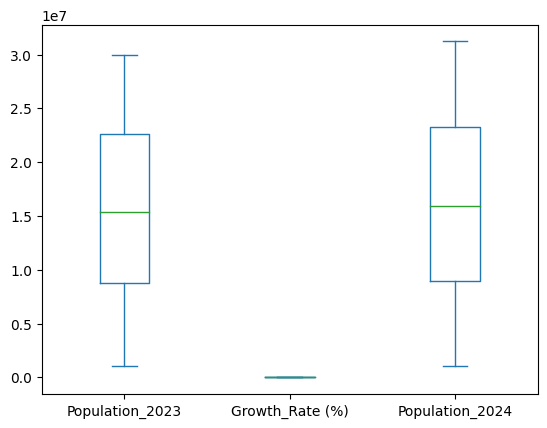

In [72]:
data.plot.box()

<Axes: >

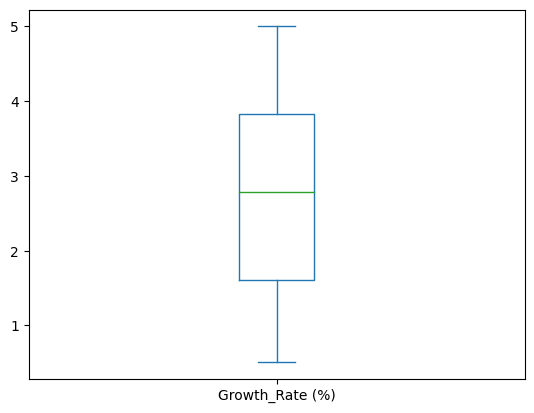

In [73]:
data["Growth_Rate (%)"].plot.box()

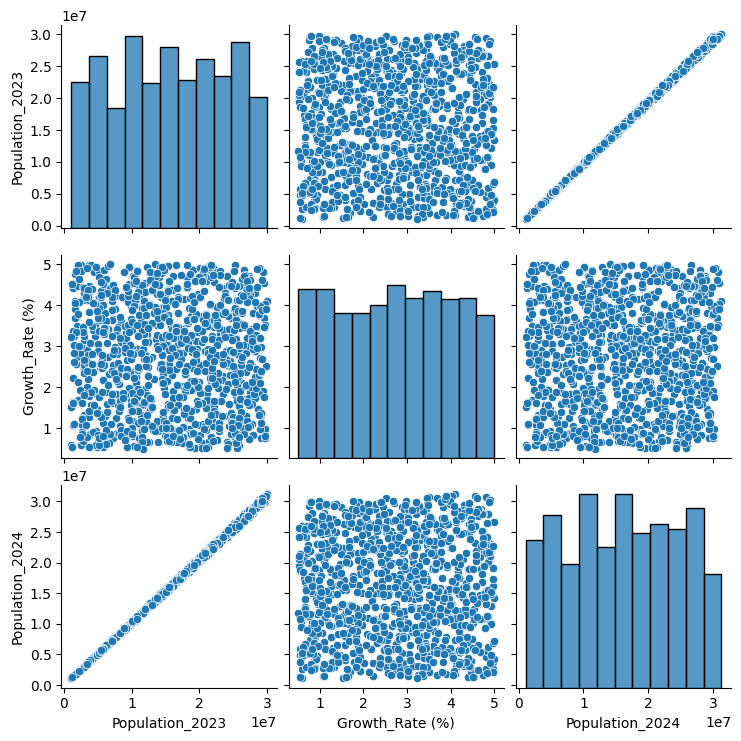

In [74]:
sns.pairplot(data)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
data.columns

Index(['City', 'Country', 'Population_2023', 'Growth_Rate (%)',
       'Population_2024'],
      dtype='object')

In [77]:
data['City'].nunique()

10

In [78]:
data['Country'].nunique()

9

In [79]:
#data = pd.get_dummies(data, columns=['City', 'Country'], prefix=['City', 'Country'],drop_first=True)

In [80]:
data.head()

,City,Country,Population_2023,Growth_Rate (%),Population_2024
0,Los Angeles,USA,26836512,1.308574,27187687
1,Shanghai,China,11673774,1.568945,11856929
2,Cairo,Egypt,22201723,4.871278,23283230
3,Mumbai,India,11440139,1.314396,11590507
4,Los Angeles,USA,3792427,4.344733,3957197


In [81]:
# data = data.astype(int)

In [88]:
data = data.drop(['City', 'Country'], axis = 1)

In [89]:
x = data.drop ('Population_2024', axis= 1)
y = data['Population_2024']

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [91]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [92]:
omp = OrthogonalMatchingPursuit()

In [93]:
omp.fit(x_train, y_train)

OrthogonalMatchingPursuit()

In [94]:
y_pred = omp.predict(x_test)

In [95]:
r2 = r2_score(y_test, y_pred)

In [96]:
r2

0.9993378264599893

In [97]:
import joblib

In [99]:
joblib.dump(omp, 'population_predictor_model.joblib')

['population_predictor_model.joblib']